In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the GML file
gml_file = 'youtube_cyberbullying_graph.gml'
G = nx.read_gml(gml_file)

In [3]:
# Function to plot the graph with centrality measures
def plot_graph_with_centrality(G, centrality_dict, centrality_name):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for visualization
    
    # Normalize centrality values for scaling node sizes
    centrality_values = list(centrality_dict.values())
    node_sizes = [1000 * (value / max(centrality_values)) for value in centrality_values]
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.7)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)
    
    # Optionally, add labels for top nodes
    top_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    nx.draw_networkx_labels(G, pos, labels={node: f"{node}" for node, _ in top_nodes}, font_size=10)
    
    plt.title(f"Graph Visualization with {centrality_name}")
    plt.axis("off")
    plt.show()

In [4]:
# Compute centrality measures
pr = nx.pagerank(G, alpha=0.8)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


In [5]:
# Compute eigenvector centrality with increased iterations and tolerance
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("\nEigenvector centrality failed to converge. Skipping visualization.")
    eigenvector_centrality = {}

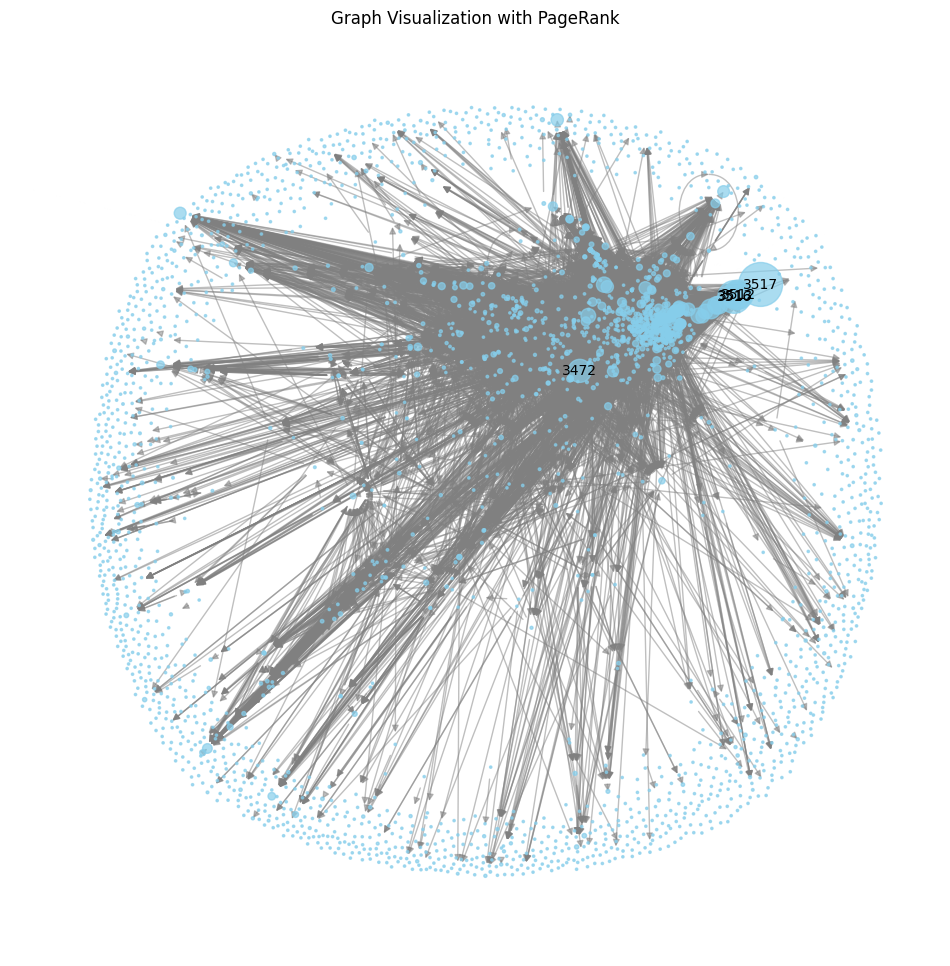

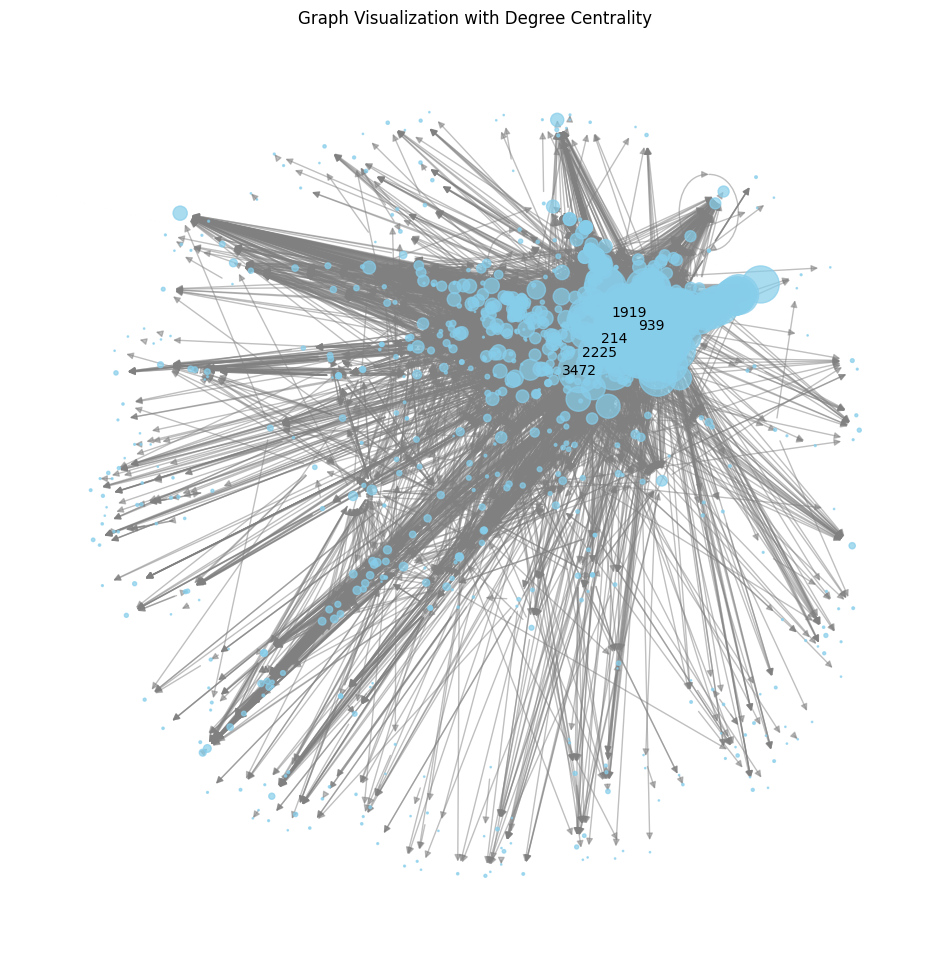

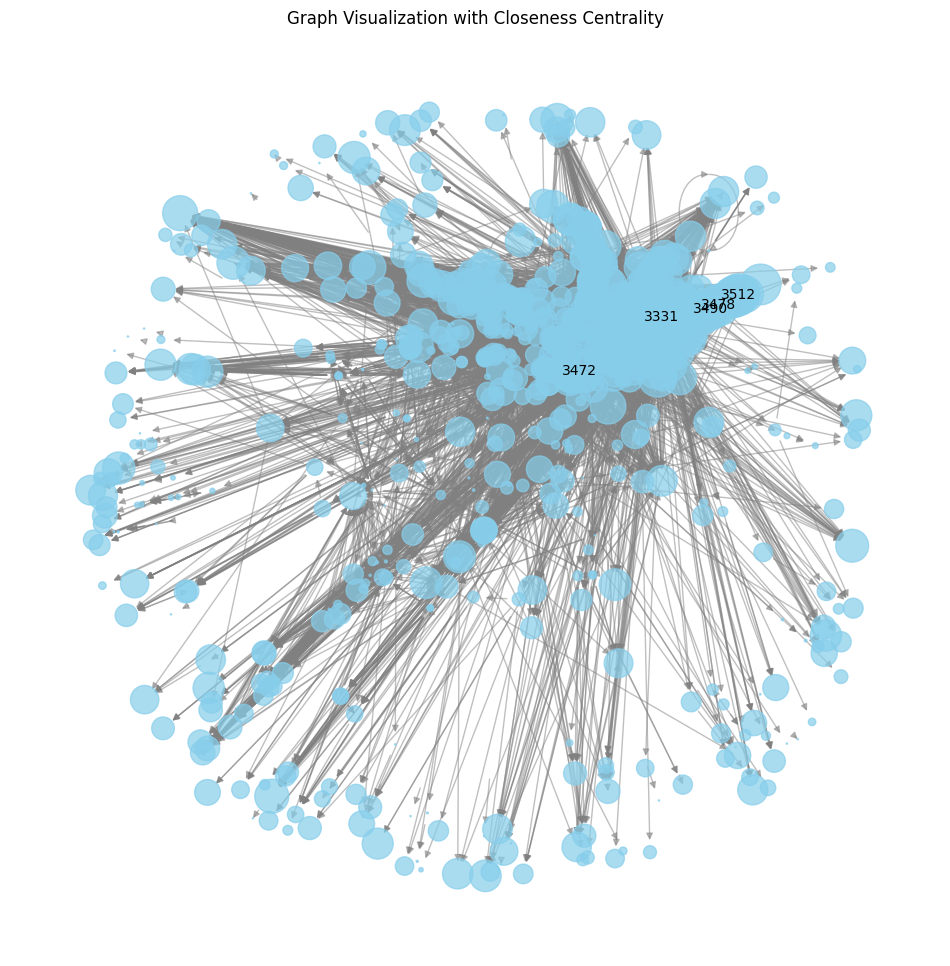

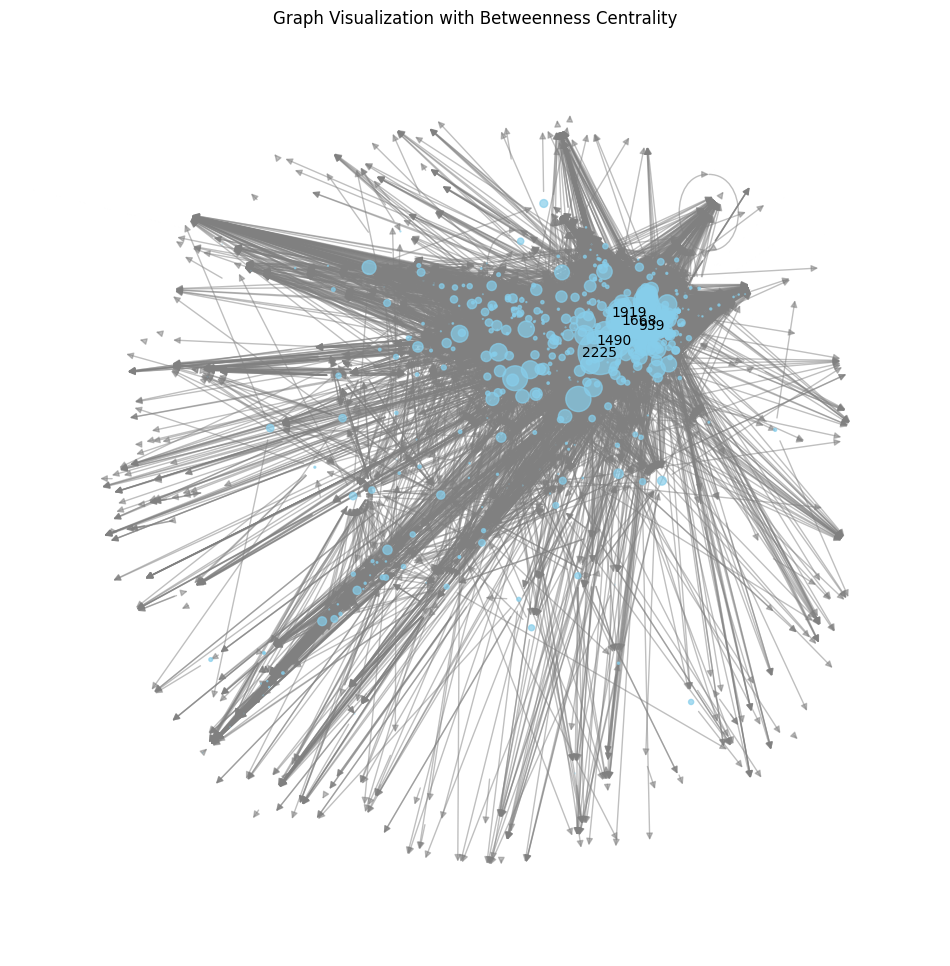

In [6]:
# Visualize the graph for each centrality measure
plot_graph_with_centrality(G, pr, "PageRank")
plot_graph_with_centrality(G, degree_centrality, "Degree Centrality")
plot_graph_with_centrality(G, closeness_centrality, "Closeness Centrality")
plot_graph_with_centrality(G, betweenness_centrality, "Betweenness Centrality")


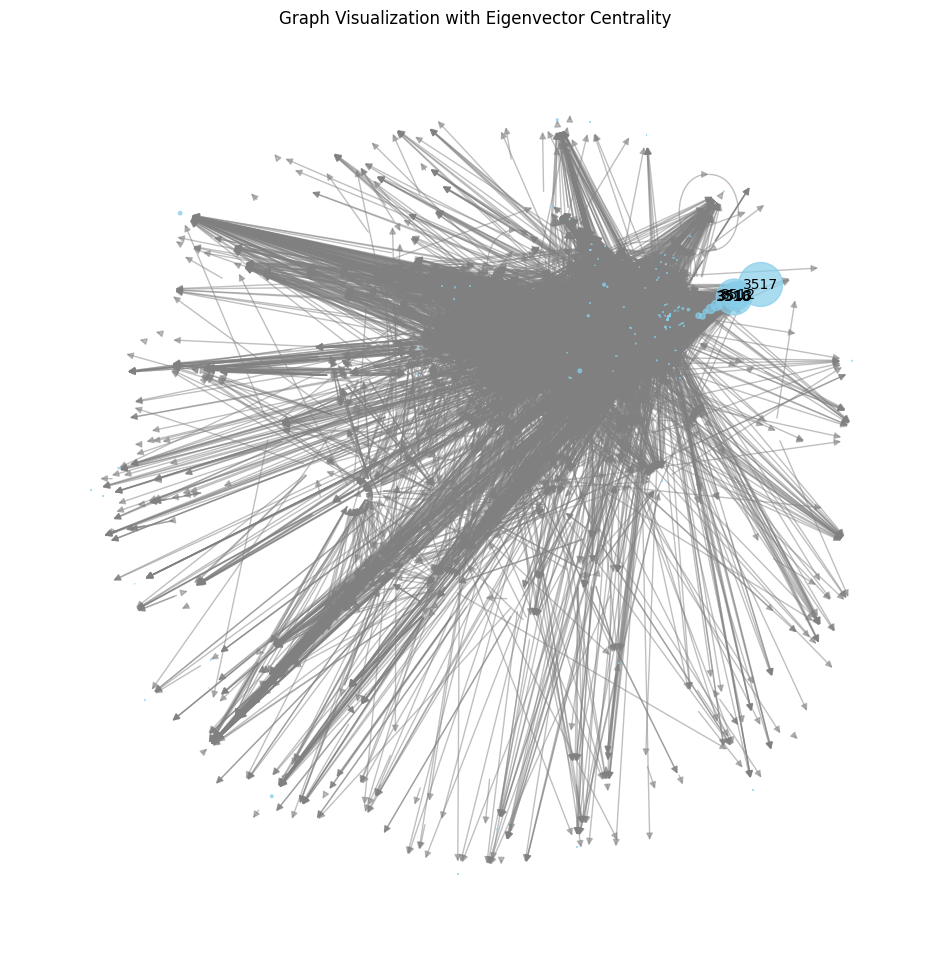

In [7]:
if eigenvector_centrality:
    plot_graph_with_centrality(G, eigenvector_centrality, "Eigenvector Centrality")